## Sobre o desafio

De acordo com o que foi ensinado no módulo, iremos trabalhar com previsões de vendas de uma loja. O dicionário disponibilizado não é difícil de entender, porém deveremos contar com as implementações que vimos no módulo para:

- Tratar os dados
- Formatar (se necessário)
- Treinar o modelo
- Prever a venda de dezembro
- Montar um histograma dos dados
- Montar um plot de scatter

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [7]:
dados_vendas

{'mes': ['Janeiro',
  'Fevereiro',
  'Março',
  'Abril',
  'Maio',
  'Junho',
  'Julho',
  'Agosto',
  'Setembro',
  'Outubro',
  'Novembro',
  'Dezembro'],
 'vendas': [2000,
  2200,
  2300,
  2500,
  2600,
  2700,
  2800,
  2900,
  3000,
  3100,
  3200,
  3300]}

In [11]:
df = pd.DataFrame(dados_vendas)
df

,mes,vendas
0,Janeiro,2000
1,Fevereiro,2200
2,Março,2300
3,Abril,2500
4,Maio,2600
5,Junho,2700
6,Julho,2800
7,Agosto,2900
8,Setembro,3000
9,Outubro,3100


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mes         12 non-null     object
 1   vendas      12 non-null     int64 
 2   mes_numero  12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 420.0+ bytes


In [14]:
df['mes_numero'] = range(1, 13)

In [34]:
df

,mes,vendas,mes_numero
0,Janeiro,2000,1
1,Fevereiro,2200,2
2,Março,2300,3
3,Abril,2500,4
4,Maio,2600,5
5,Junho,2700,6
6,Julho,2800,7
7,Agosto,2900,8
8,Setembro,3000,9
9,Outubro,3100,10


In [22]:
X = df[['mes_numero']]
y = df['vendas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [26]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 5765.308510970296
R^2 Score: 0.9804933170681456


In [27]:
# Exibir os coeficientes do modelo
print(f"Intercepto: {model.intercept_}")
print(f"Coeficiente: {model.coef_}")

Intercepto: 2019.553072625698
Coeficiente: [109.3575419]


In [36]:
# Criar um DataFrame com o mês de dezembro
dezembro = pd.DataFrame({'mes_numero': [12]})

# Prever as vendas para dezembro
y_pred_dezembro = model.predict(dezembro)

# Exibir o resultado
print(f'Previsão de vendas para dezembro: {y_pred_dezembro[0]:.2f}')

Previsão de vendas para dezembro: 3331.84


In [37]:
# Criar um DataFrame com o mês de janeiro proximo ano
janeiro2 = pd.DataFrame({'mes_numero': [13]})

# Prever as vendas para janeiro 2
y_pred_janeiro2 = model.predict(janeiro2)

# Exibir o resultado
print(f'Previsão de vendas para dezembro: {y_pred_janeiro2[0]:.2f}')

Previsão de vendas para dezembro: 3441.20


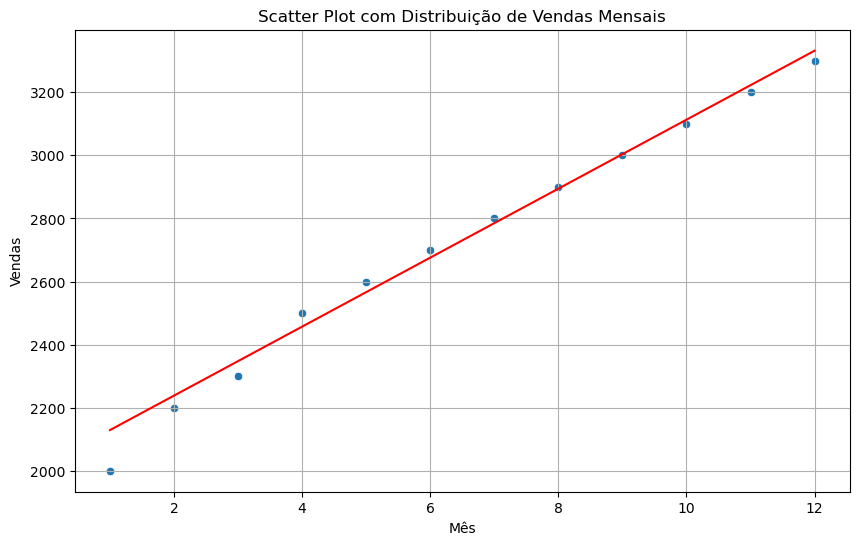

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mes_numero', y='vendas', data=df)
plt.plot(df['mes_numero'], model.predict(df[['mes_numero']]), color='red')
plt.title('Scatter Plot com Distribuição de Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()

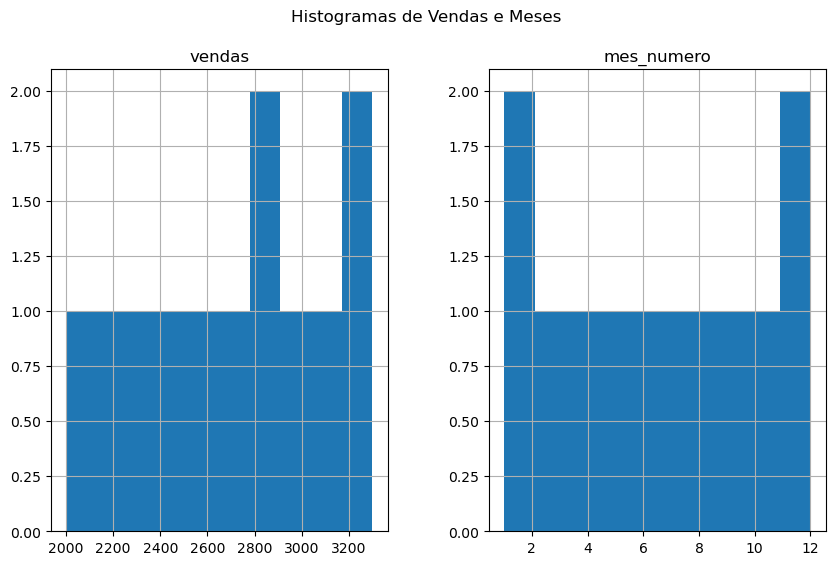

In [32]:
# Histograma de todas as variáveis
df.hist(bins=10, figsize=(10, 6), grid=True)
plt.suptitle('Histogramas de Vendas e Meses')
plt.show()